In [1]:
import os
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler

import tensorflow as tf
import json

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

from statsmodels.graphics.mosaicplot import mosaic
from statistics import stdev

from sklearn.model_selection import GroupKFold

import xgboost as xgb 
import lightgbm as lgb

import itertools

from korean_lunar_calendar import KoreanLunarCalendar
from pycaret.classification import *
from pycaret.regression import *
from time import time

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import *

from bayes_opt import BayesianOptimization

# 폰트 설정 - 윈도우
plt.rcParams['font.family'] = 'NanumGothic'

# 그래프의 크기
plt.rcParams['figure.figsize'] = 12, 6

# 글자 크기
plt.rcParams['font.size'] = 14

# 폰트 설정 시 - 기호 깨는거 방지하기
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns

# 불필요한 경고 메시지를 나오지 않도록 한다.
import warnings
warnings.filterwarnings('ignore')

# 절기 구분을 위한 모듈
import datetime
dateformat = '%Y-%m-%d'

In [2]:
BASE_DIR = './data'

In [3]:
train_path = os.path.join(BASE_DIR, '2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_댐유입량,강우,수위데이터_210902_update.xlsx')

data = pd.read_excel(train_path)
data = data[1 : ]
data = data.reset_index(drop = True)
data.iloc[:,6:] = data.iloc[:,6:].apply(pd.to_numeric)  # 수치형으로 변환

data.columns = ['홍수사상번호', '연', '월', '일', '시간', '유입량', 
                '1_유역평균강수', '1_강우(A지역)', '1_강우(B지역)', '1_강우(C지역)', '1_강우(D지역)', '1_수위(E지역)', '1_수위(D지역)', 
                '2_유역평균강수', '2_강우(A지역)', '2_강우(B지역)', '2_강우(C지역)', '2_강우(D지역)', '2_수위(E지역)', '2_수위(D지역)', 
                '3_유역평균강수', '3_강우(A지역)', '3_강우(B지역)', '3_강우(C지역)', '3_강우(D지역)', '3_수위(E지역)', '3_수위(D지역)',
                '4_유역평균강수', '4_강우(A지역)', '4_강우(B지역)', '4_강우(C지역)', '4_강우(D지역)', '4_수위(E지역)', '4_수위(D지역)',
                '5_유역평균강수', '5_강우(A지역)', '5_강우(B지역)', '5_강우(C지역)', '5_강우(D지역)', '5_수위(E지역)', '5_수위(D지역)',
                '6_유역평균강수', '6_강우(A지역)', '6_강우(B지역)', '6_강우(C지역)', '6_강우(D지역)', '6_수위(E지역)', '6_수위(D지역)']

## 기온

In [4]:
weather_path = os.path.join(BASE_DIR, '기상데이터.csv')

weather_data = pd.read_csv(weather_path, encoding = 'euc-kr')
print('기상데이터 적용 전 :', data.shape)
data = pd.merge(data, weather_data,left_index=True, right_index=True, how='left')

print('기상데이터 적용 후 :', data.shape)

기상데이터 적용 전 : (3051, 48)
기상데이터 적용 후 : (3051, 52)


In [5]:
data_feat = data.copy()

data_7 = data_feat[['1_유역평균강수', '2_유역평균강수', '3_유역평균강수', '4_유역평균강수', '5_유역평균강수', '6_유역평균강수']]
lst = []
lst_mean = []
for i in range(len(data_7)) :
    lst.append(list(data_7.loc[i]))
    lst[i].sort()
    lst[i].pop()
    lst[i].sort(reverse = True)
    lst[i].pop()
    lst_mean.append(np.mean(lst[i]))

data_feat_7 = pd.DataFrame(lst_mean, columns = ['7_유역평균강수'])

data_7 = data_feat[['1_강우(A지역)', '2_강우(A지역)', '3_강우(A지역)', '4_강우(A지역)', '5_강우(A지역)', '6_강우(A지역)']]
lst = []
lst_mean = []
for i in range(len(data_7)) :
    lst.append(list(data_7.loc[i]))
    lst[i].sort()
    lst[i].pop()
    lst[i].sort(reverse = True)
    lst[i].pop()
    lst_mean.append(np.mean(lst[i]))

data_feat_7 = pd.concat([data_feat_7, pd.DataFrame(lst_mean, columns = ['7_강우(A지역)'])], axis = 1)

data_7 = data_feat[['1_강우(B지역)', '2_강우(B지역)', '3_강우(B지역)', '4_강우(B지역)', '5_강우(B지역)', '6_강우(B지역)']]
lst = []
lst_mean = []
for i in range(len(data_7)) :
    lst.append(list(data_7.loc[i]))
    lst[i].sort()
    lst[i].pop()
    lst[i].sort(reverse = True)
    lst[i].pop()
    lst_mean.append(np.mean(lst[i]))

data_feat_7 = pd.concat([data_feat_7, pd.DataFrame(lst_mean, columns = ['7_강우(B지역)'])], axis = 1)

data_7 = data_feat[['1_강우(C지역)', '2_강우(C지역)', '3_강우(C지역)', '4_강우(C지역)', '5_강우(C지역)', '6_강우(C지역)']]
lst = []
lst_mean = []
for i in range(len(data_7)) :
    lst.append(list(data_7.loc[i]))
    lst[i].sort()
    lst[i].pop()
    lst[i].sort(reverse = True)
    lst[i].pop()
    lst_mean.append(np.mean(lst[i]))

data_feat_7 = pd.concat([data_feat_7, pd.DataFrame(lst_mean, columns = ['7_강우(C지역)'])], axis = 1)

data_7 = data_feat[['1_강우(D지역)', '2_강우(D지역)', '3_강우(D지역)', '4_강우(D지역)', '5_강우(D지역)', '6_강우(D지역)']]
lst = []
lst_mean = []
for i in range(len(data_7)) :
    lst.append(list(data_7.loc[i]))
    lst[i].sort()
    lst[i].pop()
    lst[i].sort(reverse = True)
    lst[i].pop()
    lst_mean.append(np.mean(lst[i]))

data_feat_7 = pd.concat([data_feat_7, pd.DataFrame(lst_mean, columns = ['7_강우(D지역)'])], axis = 1)

data_7 = data_feat[['1_수위(D지역)', '2_수위(D지역)', '3_수위(D지역)', '4_수위(D지역)', '5_수위(D지역)', '6_수위(D지역)']]
lst = []
lst_mean = []
for i in range(len(data_7)) :
    lst.append(list(data_7.loc[i]))
    lst[i].sort()
    lst[i].pop()
    lst[i].sort(reverse = True)
    lst[i].pop()
    lst_mean.append(np.mean(lst[i]))

data_feat_7 = pd.concat([data_feat_7, pd.DataFrame(lst_mean, columns = ['7_수위(D지역)'])], axis = 1)
data_feat = pd.concat([data_feat, data_feat_7], axis = 1)

In [6]:
# rolling 1
data_rolling = data_feat[['홍수사상번호']]
lst = [data_rolling[data_rolling['홍수사상번호'] == i].iloc[0 : 1].index for i in range(1, 27)]
lst = list(itertools.chain.from_iterable(lst))

data_rolling['7_유역평균강수_shift_1'] = data_feat['7_유역평균강수'].shift(1)
data_rolling['7_강우(A지역)_shift_1'] = data_feat['7_강우(A지역)'].shift(1)
data_rolling['7_강우(B지역)_shift_1'] = data_feat['7_강우(B지역)'].shift(1)
data_rolling['7_강우(C지역)_shift_1'] = data_feat['7_강우(C지역)'].shift(1)
data_rolling['7_강우(D지역)_shift_1'] = data_feat['7_강우(D지역)'].shift(1)
data_rolling['7_수위(D지역)_shift_1'] = data_feat['7_수위(D지역)'].shift(1)
data_rolling['7_수위(E지역)_shift_1'] = data_feat['1_수위(E지역)'].shift(1)
for i in range(1, 27) :
    dx = data_rolling[data_rolling['홍수사상번호'] == i]['7_유역평균강수_shift_1'].iloc[1] - (data_rolling[data_rolling['홍수사상번호'] == i]['7_유역평균강수_shift_1'].iloc[2] - data_rolling[data_rolling['홍수사상번호'] == i]['7_유역평균강수_shift_1'].iloc[1])
    if dx < 0 :
        data_rolling.loc[lst[i-1], '7_유역평균강수_shift_1'] = 0
    else :
        data_rolling.loc[lst[i-1], '7_유역평균강수_shift_1'] = dx

    dx = data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(A지역)_shift_1'].iloc[1] - (data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(A지역)_shift_1'].iloc[2] - data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(A지역)_shift_1'].iloc[1])
    if dx < 0 :
        data_rolling.loc[lst[i-1], '7_강우(A지역)_shift_1'] = 0
    else :
        data_rolling.loc[lst[i-1], '7_강우(A지역)_shift_1'] = dx

    dx = data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(B지역)_shift_1'].iloc[1] - (data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(B지역)_shift_1'].iloc[2] - data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(B지역)_shift_1'].iloc[1])
    if dx < 0 :
        data_rolling.loc[lst[i-1], '7_강우(B지역)_shift_1'] = 0
    else :
        data_rolling.loc[lst[i-1], '7_강우(B지역)_shift_1'] = dx

    dx = data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(C지역)_shift_1'].iloc[1] - (data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(C지역)_shift_1'].iloc[2] - data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(C지역)_shift_1'].iloc[1])
    if dx < 0 :
        data_rolling.loc[lst[i-1], '7_강우(C지역)_shift_1'] = 0
    else :
        data_rolling.loc[lst[i-1], '7_강우(C지역)_shift_1'] = dx

    dx = data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(D지역)_shift_1'].iloc[1] - (data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(D지역)_shift_1'].iloc[2] - data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(D지역)_shift_1'].iloc[1])
    if dx < 0 :
        data_rolling.loc[lst[i-1], '7_강우(D지역)_shift_1'] = 0
    else :
        data_rolling.loc[lst[i-1], '7_강우(D지역)_shift_1'] = dx

    dx = data_rolling[data_rolling['홍수사상번호'] == i]['7_수위(D지역)_shift_1'].iloc[1] - (data_rolling[data_rolling['홍수사상번호'] == i]['7_수위(D지역)_shift_1'].iloc[2] - data_rolling[data_rolling['홍수사상번호'] == i]['7_수위(D지역)_shift_1'].iloc[1])
    if dx < 0 :
        data_rolling.loc[lst[i-1], '7_수위(D지역)_shift_1'] = 0
    else :
        data_rolling.loc[lst[i-1], '7_수위(D지역)_shift_1'] = dx

    dx = data_rolling[data_rolling['홍수사상번호'] == i]['7_수위(E지역)_shift_1'].iloc[1] - (data_rolling[data_rolling['홍수사상번호'] == i]['7_수위(E지역)_shift_1'].iloc[2] - data_rolling[data_rolling['홍수사상번호'] == i]['7_수위(E지역)_shift_1'].iloc[1])
    if dx < 0 :
        data_rolling.loc[lst[i-1], '7_수위(E지역)_shift_1'] = 0
    else :
        data_rolling.loc[lst[i-1], '7_수위(E지역)_shift_1'] = dx

data_rolling = data_rolling.drop(['홍수사상번호'], axis = 1)

data_feat = pd.concat([data_feat, data_rolling], axis = 1)

In [7]:
# rolling 2
data_rolling = data_feat[['홍수사상번호']]
lst = [data_rolling[data_rolling['홍수사상번호'] == i].iloc[0 : 1].index for i in range(1, 27)]
lst = list(itertools.chain.from_iterable(lst))

data_rolling['7_유역평균강수_shift_2'] = data_feat['7_유역평균강수_shift_1'].shift(1)
data_rolling['7_강우(A지역)_shift_2'] = data_feat['7_강우(A지역)_shift_1'].shift(1)
data_rolling['7_강우(B지역)_shift_2'] = data_feat['7_강우(B지역)_shift_1'].shift(1)
data_rolling['7_강우(C지역)_shift_2'] = data_feat['7_강우(C지역)_shift_1'].shift(1)
data_rolling['7_강우(D지역)_shift_2'] = data_feat['7_강우(D지역)_shift_1'].shift(1)
data_rolling['7_수위(D지역)_shift_2'] = data_feat['7_수위(D지역)_shift_1'].shift(1)
data_rolling['7_수위(E지역)_shift_2'] = data_feat['7_수위(E지역)_shift_1'].shift(1)
for i in range(1, 27) :
    dx = data_rolling[data_rolling['홍수사상번호'] == i]['7_유역평균강수_shift_2'].iloc[1] - (data_rolling[data_rolling['홍수사상번호'] == i]['7_유역평균강수_shift_2'].iloc[2] - data_rolling[data_rolling['홍수사상번호'] == i]['7_유역평균강수_shift_2'].iloc[1])
    if dx < 0 :
        data_rolling.loc[lst[i-1], '7_유역평균강수_shift_2'] = 0
    else :
        data_rolling.loc[lst[i-1], '7_유역평균강수_shift_2'] = dx
        
    dx = data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(A지역)_shift_2'].iloc[1] - (data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(A지역)_shift_2'].iloc[2] - data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(A지역)_shift_2'].iloc[1])
    if dx < 0 :
        data_rolling.loc[lst[i-1], '7_강우(A지역)_shift_2'] = 0
    else :
        data_rolling.loc[lst[i-1], '7_강우(A지역)_shift_2'] = dx

    dx = data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(B지역)_shift_2'].iloc[1] - (data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(B지역)_shift_2'].iloc[2] - data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(B지역)_shift_2'].iloc[1])
    if dx < 0 :
        data_rolling.loc[lst[i-1], '7_강우(B지역)_shift_2'] = 0
    else :
        data_rolling.loc[lst[i-1], '7_강우(B지역)_shift_2'] = dx

    dx = data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(C지역)_shift_2'].iloc[1] - (data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(C지역)_shift_2'].iloc[2] - data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(C지역)_shift_2'].iloc[1])
    if dx < 0 :
        data_rolling.loc[lst[i-1], '7_강우(C지역)_shift_2'] = 0
    else :
        data_rolling.loc[lst[i-1], '7_강우(C지역)_shift_2'] = dx

    dx = data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(D지역)_shift_2'].iloc[1] - (data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(D지역)_shift_2'].iloc[2] - data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(D지역)_shift_2'].iloc[1])
    if dx < 0 :
        data_rolling.loc[lst[i-1], '7_강우(D지역)_shift_2'] = 0
    else :
        data_rolling.loc[lst[i-1], '7_강우(D지역)_shift_2'] = dx

    dx = data_rolling[data_rolling['홍수사상번호'] == i]['7_수위(D지역)_shift_2'].iloc[1] - (data_rolling[data_rolling['홍수사상번호'] == i]['7_수위(D지역)_shift_2'].iloc[2] - data_rolling[data_rolling['홍수사상번호'] == i]['7_수위(D지역)_shift_2'].iloc[1])
    if dx < 0 :
        data_rolling.loc[lst[i-1], '7_수위(D지역)_shift_2'] = 0
    else :
        data_rolling.loc[lst[i-1], '7_수위(D지역)_shift_2'] = dx

    dx = data_rolling[data_rolling['홍수사상번호'] == i]['7_수위(E지역)_shift_2'].iloc[1] - (data_rolling[data_rolling['홍수사상번호'] == i]['7_수위(E지역)_shift_2'].iloc[2] - data_rolling[data_rolling['홍수사상번호'] == i]['7_수위(E지역)_shift_2'].iloc[1])
    if dx < 0 :
        data_rolling.loc[lst[i-1], '7_수위(E지역)_shift_2'] = 0
    else :
        data_rolling.loc[lst[i-1], '7_수위(E지역)_shift_2'] = dx

data_rolling = data_rolling.drop(['홍수사상번호'], axis = 1)
data_feat = pd.concat([data_feat, data_rolling], axis = 1)

In [8]:
# rolling 3
data_rolling = data_feat[['홍수사상번호']]
lst = [data_rolling[data_rolling['홍수사상번호'] == i].iloc[0 : 1].index for i in range(1, 27)]
lst = list(itertools.chain.from_iterable(lst))

data_rolling['7_유역평균강수_shift_3'] = data_feat['7_유역평균강수_shift_2'].shift(1)
data_rolling['7_강우(A지역)_shift_3'] = data_feat['7_강우(A지역)_shift_2'].shift(1)
data_rolling['7_강우(B지역)_shift_3'] = data_feat['7_강우(B지역)_shift_2'].shift(1)
data_rolling['7_강우(C지역)_shift_3'] = data_feat['7_강우(C지역)_shift_2'].shift(1)
data_rolling['7_강우(D지역)_shift_3'] = data_feat['7_강우(D지역)_shift_2'].shift(1)
data_rolling['7_수위(D지역)_shift_3'] = data_feat['7_수위(D지역)_shift_2'].shift(1)
data_rolling['7_수위(E지역)_shift_3'] = data_feat['7_수위(E지역)_shift_2'].shift(1)
for i in range(1, 27) :
    dx = data_rolling[data_rolling['홍수사상번호'] == i]['7_유역평균강수_shift_3'].iloc[1] - (data_rolling[data_rolling['홍수사상번호'] == i]['7_유역평균강수_shift_3'].iloc[2] - data_rolling[data_rolling['홍수사상번호'] == i]['7_유역평균강수_shift_3'].iloc[1])
    if dx < 0 :
        data_rolling.loc[lst[i-1], '7_유역평균강수_shift_3'] = 0
    else :
        data_rolling.loc[lst[i-1], '7_유역평균강수_shift_3'] = dx

    dx = data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(A지역)_shift_3'].iloc[1] - (data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(A지역)_shift_3'].iloc[2] - data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(A지역)_shift_3'].iloc[1])
    if dx < 0 :
        data_rolling.loc[lst[i-1], '7_강우(A지역)_shift_3'] = 0
    else :
        data_rolling.loc[lst[i-1], '7_강우(A지역)_shift_3'] = dx

    dx = data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(B지역)_shift_3'].iloc[1] - (data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(B지역)_shift_3'].iloc[2] - data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(B지역)_shift_3'].iloc[1])
    if dx < 0 :
        data_rolling.loc[lst[i-1], '7_강우(B지역)_shift_3'] = 0
    else :
        data_rolling.loc[lst[i-1], '7_강우(B지역)_shift_3'] = dx

    dx = data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(C지역)_shift_3'].iloc[1] - (data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(C지역)_shift_3'].iloc[2] - data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(C지역)_shift_3'].iloc[1])
    if dx < 0 :
        data_rolling.loc[lst[i-1], '7_강우(C지역)_shift_3'] = 0
    else :
        data_rolling.loc[lst[i-1], '7_강우(C지역)_shift_3'] = dx

    dx = data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(D지역)_shift_3'].iloc[1] - (data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(D지역)_shift_3'].iloc[2] - data_rolling[data_rolling['홍수사상번호'] == i]['7_강우(D지역)_shift_3'].iloc[1])
    if dx < 0 :
        data_rolling.loc[lst[i-1], '7_강우(D지역)_shift_3'] = 0
    else :
        data_rolling.loc[lst[i-1], '7_강우(D지역)_shift_3'] = dx

    dx = data_rolling[data_rolling['홍수사상번호'] == i]['7_수위(D지역)_shift_3'].iloc[1] - (data_rolling[data_rolling['홍수사상번호'] == i]['7_수위(D지역)_shift_3'].iloc[2] - data_rolling[data_rolling['홍수사상번호'] == i]['7_수위(D지역)_shift_3'].iloc[1])
    if dx < 0 :
        data_rolling.loc[lst[i-1], '7_수위(D지역)_shift_3'] = 0
    else :
        data_rolling.loc[lst[i-1], '7_수위(D지역)_shift_3'] = dx

    dx = data_rolling[data_rolling['홍수사상번호'] == i]['7_수위(E지역)_shift_3'].iloc[1] - (data_rolling[data_rolling['홍수사상번호'] == i]['7_수위(E지역)_shift_3'].iloc[2] - data_rolling[data_rolling['홍수사상번호'] == i]['7_수위(E지역)_shift_3'].iloc[1])
    if dx < 0 :
        data_rolling.loc[lst[i-1], '7_수위(E지역)_shift_3'] = 0
    else :
        data_rolling.loc[lst[i-1], '7_수위(E지역)_shift_3'] = dx

data_rolling = data_rolling.drop(['홍수사상번호'], axis = 1)
data_feat = pd.concat([data_feat, data_rolling], axis = 1)

In [9]:
# Difference
data_feat['7_유역평균강수_diff'] = pd.DataFrame(data_feat['7_유역평균강수'] - data_feat['7_유역평균강수_shift_1'])
data_feat['7_강우(A지역)_diff'] = pd.DataFrame(data_feat['7_강우(A지역)'] - data_feat['7_강우(A지역)_shift_1'])
data_feat['7_강우(B지역)_diff'] = pd.DataFrame(data_feat['7_강우(B지역)'] - data_feat['7_강우(B지역)_shift_1'])
data_feat['7_강우(C지역)_diff'] = pd.DataFrame(data_feat['7_강우(C지역)'] - data_feat['7_강우(C지역)_shift_1'])
data_feat['7_강우(D지역)_diff'] = pd.DataFrame(data_feat['7_강우(D지역)'] - data_feat['7_강우(D지역)_shift_1'])
data_feat['7_수위(D지역)_diff'] = pd.DataFrame(data_feat['7_수위(D지역)'] - data_feat['7_수위(D지역)_shift_1'])
data_feat['7_수위(E지역)_diff'] = pd.DataFrame(data_feat['1_수위(E지역)'] - data_feat['7_수위(E지역)_shift_1'])

# 홍수기간
rain = data_feat.groupby('홍수사상번호')['시간'].count()
lst = np.array(rain.tolist())

flood = []
for i in range(26):
    x = list(range(1, lst[i]+1))
    flood.extend(x)

flood = pd.DataFrame(flood)
flood.columns = ['홍수기간']
data_feat = pd.concat([data_feat, flood], axis = 1)

data_feat

# 홍수기간 binning
bins = [0,30, 50, 70, 100, 120, 160, 220] 
data_feat['홍수_bin'] = np.digitize(data_feat['홍수기간'], bins)
data_feat.groupby('홍수_bin')[['홍수기간']].count()

,홍수기간
홍수_bin,
1,754
2,494
3,416
4,480
5,196
6,263
7,287
8,161


In [10]:
# kmeans를 하기위해서는 변수들이 수치형데이터여야 한다. 그리고 타겟변수인 유입량도 빼준다.
# 그리고 시간의 영향을 제거해보기 위해 시간관련 열들도 제거해본다
data_feat_target = data_feat[data_feat['홍수사상번호'] > 25]
data_feat = data_feat[data_feat['홍수사상번호'] < 26]
data_feat_kmeans = data_feat.drop(['홍수사상번호', '연', '월', '일', '시간', '일시', '유입량'], axis = 1)
data_feat_target_kmeans = data_feat_target.drop(['홍수사상번호', '연', '월', '일', '시간', '일시', '유입량'], axis = 1)

# create model and prediction
scaler = StandardScaler()
model = KMeans(n_clusters=2,algorithm='auto')
pipeline = make_pipeline(scaler,model)
pipeline.fit(data_feat_kmeans)

predict_target = pd.DataFrame(pipeline.predict(data_feat_target_kmeans))
predict_target.columns=['kmeans']
predict = pd.DataFrame(pipeline.predict(data_feat_kmeans))
predict.columns=['kmeans']

# 인덱스 초기화 해서 합친 후 다시 기존 인덱스 사용
data_feat = pd.concat([pd.concat([data_feat, predict], axis = 1), pd.concat([data_feat_target.reset_index(), predict_target], axis = 1).set_index('index')])

In [11]:
data_time = data_feat[['연', '월', '일', '시간']]

data_time['연'] = [str(int(i)) for i in data_time['연']]
data_time['월'] = [str(int(i)) for i in data_time['월']]
data_time['일'] = [str(int(i)) for i in data_time['일']]
data_time['시간'] = [str(int(i)) for i in data_time['시간']]

# 7월 8일 기준으로 일 차이를 열로 만든다 (소서)
data_time['월일'] = data_time['월'] + '-' + data_time['일']
data_time['월일'] = [datetime.datetime.strptime(i, '%m-%d')  for i in data_time['월일']]
data_time['월일'] = data_time['월일'] - datetime.datetime.strptime('7-8', '%m-%d')
data_time['월일'] = [i.days for i in data_time['월일']]
data_time['절기'] = data_time['월일']
data_time['절기'] = [i // 15 for i in data_time['절기']]

# 6/28 부터 9/24일 까지 시작일 포함 총 89일.
for i in range(len(data_time)) :
    if data_time['절기'].iloc[i] < 0 :
        data_time.loc[i, '절기'] = '하지'
    elif data_time['절기'].iloc[i] == 0 :
        data_time.loc[i, '절기'] = '소서'
    elif data_time['절기'].iloc[i] == 1 :
        data_time.loc[i, '절기'] = '대서'
    elif data_time['절기'].iloc[i] == 2 :
        data_time.loc[i, '절기'] = '입추'
    elif data_time['절기'].iloc[i] == 3 :
        data_time.loc[i, '절기'] = '처서'
    elif data_time['절기'].iloc[i] == 4 :
        data_time.loc[i, '절기'] = '백로'
    else :
        data_time.loc[i, '절기'] = '추분'
    
data_time = data_time[['절기']]
data_feat = pd.concat([data_feat, data_time], axis = 1)

In [12]:
data_feat['홍수사상번호'] = data_feat['홍수사상번호'].astype('object')

In [13]:
data_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3051 entries, 0 to 3050
Data columns (total 90 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   홍수사상번호             3051 non-null   object 
 1   연                  3051 non-null   float64
 2   월                  3051 non-null   float64
 3   일                  3051 non-null   float64
 4   시간                 3051 non-null   float64
 5   유입량                2891 non-null   float64
 6   1_유역평균강수           3051 non-null   float64
 7   1_강우(A지역)          3051 non-null   int64  
 8   1_강우(B지역)          3051 non-null   int64  
 9   1_강우(C지역)          3051 non-null   int64  
 10  1_강우(D지역)          3051 non-null   int64  
 11  1_수위(E지역)          3051 non-null   float64
 12  1_수위(D지역)          3051 non-null   float64
 13  2_유역평균강수           3051 non-null   float64
 14  2_강우(A지역)          3051 non-null   int64  
 15  2_강우(B지역)          3051 non-null   int64  
 16  2_강우(C지역)          3051 

In [35]:
py_data = data_feat.copy()
py_data['홍수사상번호'] = py_data['홍수사상번호'].astype('object')
py_data = py_data[py_data['홍수사상번호'] != 1]
py_data = py_data.reset_index(drop = True)
temp_list = py_data.절기.unique().tolist()
py_data['절기'] = py_data.절기.map(lambda x : temp_list.index(x))
py_data['절기'] = py_data['절기'].astype('float')
py_data['kmeans'] = py_data['kmeans'].astype('float')
py_data['홍수_bin'] = py_data['홍수_bin'].astype('float')
py_data = py_data.drop(['일시', '연', '월', '일', '시간'], axis = 1)

train = py_data[py_data['홍수사상번호'] != 26]
target = py_data[py_data['홍수사상번호'] == 26].reset_index(drop = True)
y_target = py_data[py_data['홍수사상번호'] == 26][['유입량']].reset_index(drop = True)
y_train = py_data[py_data['홍수사상번호'] != 26][['유입량']]

In [36]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()

cat_columns = [c for c, t in zip(train.dtypes.index, train.dtypes) if t=='O'] 
scale_cols = [c for c in train.drop(['유입량'], axis = 1).columns if c not in cat_columns]

# train 정규화 수행
scaled_df = scaler.fit_transform(train[scale_cols])
scaled_df = pd.DataFrame(scaled_df, columns=scale_cols)
train = train.drop(scaled_df.columns, axis = 1)

scaled_train = pd.concat([train.drop(['유입량'], axis = 1), scaled_df, y_train], axis = 1)


cat_columns = [c for c, t in zip(target.dtypes.index, target.dtypes) if t=='O'] 
scale_cols = [c for c in target.drop(['유입량'], axis = 1).columns if c not in cat_columns]

# target 정규화 수행
scaled_df = scaler.transform(target[scale_cols])
scaled_df = pd.DataFrame(scaled_df, columns=scale_cols)
target = target.drop(scaled_df.columns, axis = 1)

scaled_target = pd.concat([target.drop(['유입량'], axis = 1), scaled_df, y_target], axis = 1)

In [16]:
scaled_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 0 to 2664
Data columns (total 85 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   홍수사상번호             2665 non-null   object 
 1   1_유역평균강수           2665 non-null   float64
 2   1_강우(A지역)          2665 non-null   float64
 3   1_강우(B지역)          2665 non-null   float64
 4   1_강우(C지역)          2665 non-null   float64
 5   1_강우(D지역)          2665 non-null   float64
 6   1_수위(E지역)          2665 non-null   float64
 7   1_수위(D지역)          2665 non-null   float64
 8   2_유역평균강수           2665 non-null   float64
 9   2_강우(A지역)          2665 non-null   float64
 10  2_강우(B지역)          2665 non-null   float64
 11  2_강우(C지역)          2665 non-null   float64
 12  2_강우(D지역)          2665 non-null   float64
 13  2_수위(E지역)          2665 non-null   float64
 14  2_수위(D지역)          2665 non-null   float64
 15  3_유역평균강수           2665 non-null   float64
 16  3_강우(A지역)          2665 

In [17]:
# MAPE 값을 출력하는 함수
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 

# 베이지안 최적화를 수행하기 위한 함수 설정
def LGB_cv(n_estimators, learning_rate, max_depth, num_leaves, subsample, min_child_weight, feature_fraction, reg_alpha, reg_lambda) :  
    model = lgb.LGBMRegressor(random_state = 42,
                              n_jobs = -1 ,
                              boosting_type = 'goss',
                              n_estimators = int(n_estimators),
                              learning_rate = learning_rate,
                              max_depth = int(max_depth),
                              num_leaves = int(num_leaves),
                              subsample = subsample,
                              min_child_weight = min_child_weight,
                              reg_alpha = reg_alpha,
                              reg_lambda = reg_lambda,
                              feature_fraction = feature_fraction,    # 매 iteraction마다 feature의 80%로 랜덤하게 구성한다. 과적합 방지로 사용
                              )
    model.fit(X_train, y_train, verbose=False)

    # 예측값 출력
    y_pred = model.predict(X_test)
    # 각종 metric 계산
    rmse = np.sqrt(mean_squared_error(y_test['유입량'], y_pred)) * -1     # -1을 곱해주는 이유는 rmse값을 최소화 시켜주는 값들을 찾기 위함
    mape = MAPE(y_test['유입량'], y_pred) * -1         # -1을 곱해주는 이유는 mape값을 최소화 시켜주는 값들을 찾기 위함
               
    return mape

In [18]:
def train_val_test(X, target, n) :
    global X_train, y_train, X_test, y_test
    
    # TEST SET
    y_test = X[X['홍수사상번호'].isin([25])][[target]].reset_index(drop = True)
    X_test = X[X['홍수사상번호'].isin([25])]
    X_test = X_test.drop([target], axis = 1).reset_index(drop = True)    
    
    # TRAIN SET
    y = X[~X['홍수사상번호'].isin([25])][[target]]
    X = X[~X['홍수사상번호'].isin([25])]
    X = X.drop([target], axis = 1)

    result = []
    result_mape = []
    
    # 홍수사상번호 별로 Group K Fold 진행
    group_kfold = GroupKFold(n_splits = n)
    groups = X['홍수사상번호'].values
    group_kfold.get_n_splits(X, y, groups = groups)
    i = 1
    
    X = X.drop(['홍수사상번호'], axis = 1)
    X_test = X_test.drop(['홍수사상번호'], axis = 1)
    
    for train_index, test_index in group_kfold.split(X, y, groups):
        print("{}번째 교차검증 {} /".format(i, i), n)
        # test -> val
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]
        y_train, y_val = y.iloc[train_index], y.iloc[test_index] 

        print("TRAIN :", X_train.shape, y_train.shape)

        # Bayesian Optimization
        bo = BayesianOptimization(f=LGB_cv, pbounds=pbounds, verbose=2, random_state = 42)   # X_train, y_train으로 학습 
        bo.maximize(init_points=3, n_iter=12, acq='ei', xi=0.01)       # 최대화 과정 수행

        # 최적화된 값들로 모델 학습
        fit_model = lgb.LGBMRegressor(random_state = 42,
                                      n_jobs = -1,
                                      boosting_type = 'goss',
                                      learning_rate = bo.max['params']['learning_rate'],
                                      num_leaves = int(bo.max['params']['num_leaves']),
                                      max_depth = int(bo.max['params']['max_depth']),
                                      min_child_weight = bo.max['params']['min_child_weight'],
                                      n_estimators = int(bo.max['params']['n_estimators']),
                                      subsample = bo.max['params']['subsample'],
                                      feature_fraction = bo.max['params']['feature_fraction'],
                                      reg_alpha = bo.max['params']['reg_alpha'],
                                      reg_lambda = bo.max['params']['reg_lambda']
                                      )


        fit_model.fit(X_train, y_train)

        y_pred = fit_model.predict(X_test)  
        df = pd.DataFrame(y_pred, columns = ['predict'])
        df['true'] = y_test.reset_index(drop = True)
        df.plot()
        plt.legend()
        plt.show()

        print('{}번째 교차검증 최적화 하이퍼파라미터 :'.format(i), fit_model)
        print('{}번째 교차검증 최적화된 MAPE값 : {}'.format(i, MAPE(y_test['유입량'], y_pred)))

        result.append(bo.max)
        result_mape.append(MAPE(y_test['유입량'], y_pred))
        i += 1
    print('교차검증 MAPE 평균 : ', np.mean(result_mape))
    return result

1번째 교차검증 1 / 23
TRAIN : (2277, 83) (2277, 1)
|   iter    |  target   | featur... | learni... | max_depth | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.4333407057741526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4333407057741526
|  1        | -41.96    |  0.4333   |  0.1906   |  5.928    |  1.796    |  5.78e+03 |  131.2    |  0.0575   |  0.8575   |  0.8006   |
[LightGBM] [Warning] feature_fraction is set=0.7301845942384805, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7301845942384805
|  2        | -23.37    |  0.7302   |  0.01391  |  6.88     |  2.497    |  6.062e+0 |  136.4    |  0.1816   |  0.3012   |  0.7624   |
[LightGBM] [Warning] feature_fraction is set=0.48443106659148305, colsample_bytree=1.0 will be ignored. Current

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


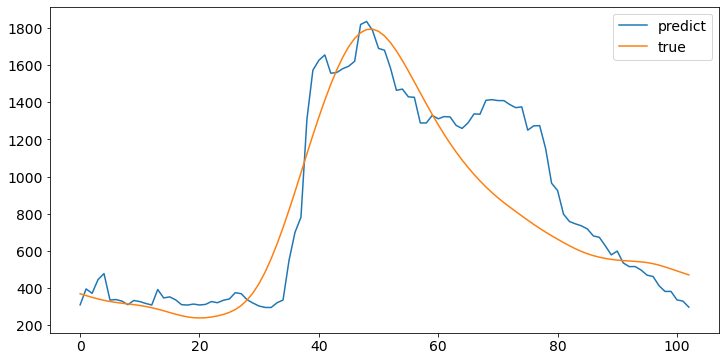

1번째 교차검증 최적화 하이퍼파라미터 : LGBMRegressor(boosting_type='goss', feature_fraction=0.7301845942384805,
              learning_rate=0.013911053916202464, max_depth=6,
              min_child_weight=2.497327922401265, n_estimators=6061,
              num_leaves=136, random_state=42, reg_alpha=0.1815704647548995,
              reg_lambda=0.3011998205299423, subsample=0.762378215816119)
1번째 교차검증 최적화된 MAPE값 : 23.371011036006085
2번째 교차검증 2 / 23
TRAIN : (2298, 83) (2298, 1)
|   iter    |  target   | featur... | learni... | max_depth | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.4333407057741526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4333407057741526
|  1        | -38.56    |  0.4333   |  0.1906   |  5.928    |  1.796    |  5.78e+03 |  131.2    |  0.0575   |  0.

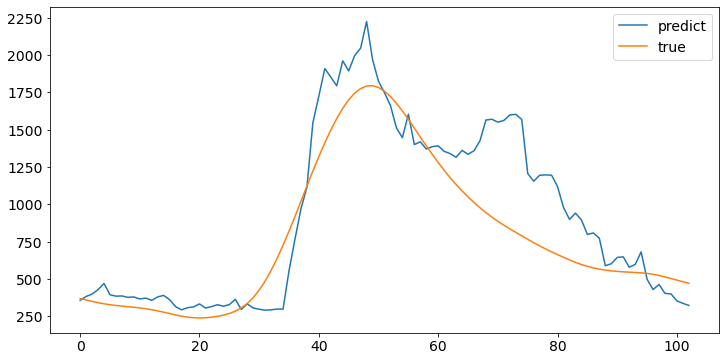

2번째 교차검증 최적화 하이퍼파라미터 : LGBMRegressor(boosting_type='goss', feature_fraction=0.7770000834225976,
              learning_rate=0.14816927376596317, max_depth=5,
              min_child_weight=0.22634193152740667, n_estimators=6413,
              num_leaves=185, random_state=42, reg_alpha=0.023192578393987293,
              reg_lambda=0.9575539951600276, subsample=0.6051769440265253)
2번째 교차검증 최적화된 MAPE값 : 28.81240200858227
3번째 교차검증 3 / 23
TRAIN : (2300, 83) (2300, 1)
|   iter    |  target   | featur... | learni... | max_depth | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.4333407057741526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4333407057741526
|  1        | -27.21    |  0.4333   |  0.1906   |  5.928    |  1.796    |  5.78e+03 |  131.2    |  0.0575   | 

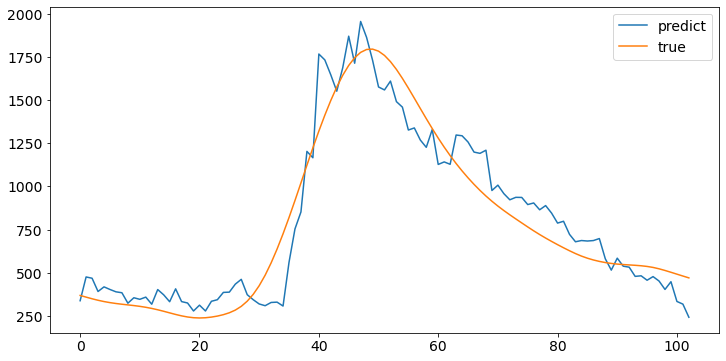

3번째 교차검증 최적화 하이퍼파라미터 : LGBMRegressor(boosting_type='goss', feature_fraction=0.7770000834225976,
              learning_rate=0.14816927376596317, max_depth=5,
              min_child_weight=0.22634193152740667, n_estimators=6413,
              num_leaves=185, random_state=42, reg_alpha=0.023192578393987293,
              reg_lambda=0.9575539951600276, subsample=0.6051769440265253)
3번째 교차검증 최적화된 MAPE값 : 19.521657799315857
4번째 교차검증 4 / 23
TRAIN : (2357, 83) (2357, 1)
|   iter    |  target   | featur... | learni... | max_depth | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.4333407057741526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4333407057741526
|  1        | -36.03    |  0.4333   |  0.1906   |  5.928    |  1.796    |  5.78e+03 |  131.2    |  0.0575   |

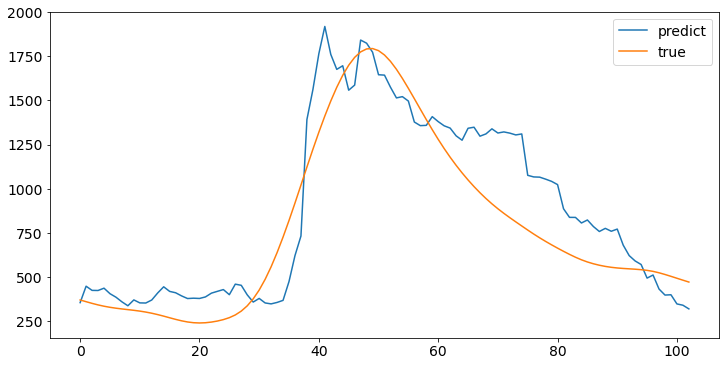

4번째 교차검증 최적화 하이퍼파라미터 : LGBMRegressor(boosting_type='goss', feature_fraction=0.22836633724078045,
              learning_rate=0.06037609261894458, max_depth=6,
              min_child_weight=2.9020485789818, n_estimators=8151,
              num_leaves=121, random_state=42, reg_alpha=0.8598515948070964,
              reg_lambda=0.011872154703220032, subsample=0.9593201938296682)
4번째 교차검증 최적화된 MAPE값 : 29.60753716761016
5번째 교차검증 5 / 23
TRAIN : (2434, 83) (2434, 1)
|   iter    |  target   | featur... | learni... | max_depth | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.4333407057741526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4333407057741526
|  1        | -31.12    |  0.4333   |  0.1906   |  5.928    |  1.796    |  5.78e+03 |  131.2    |  0.0575   |  0.

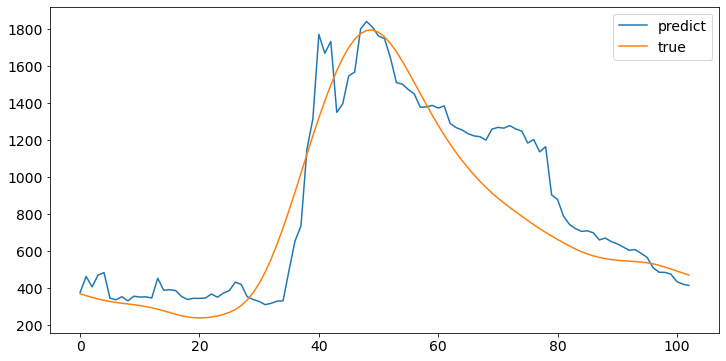

5번째 교차검증 최적화 하이퍼파라미터 : LGBMRegressor(boosting_type='goss', feature_fraction=0.7301845942384805,
              learning_rate=0.013911053916202464, max_depth=6,
              min_child_weight=2.497327922401265, n_estimators=6061,
              num_leaves=136, random_state=42, reg_alpha=0.1815704647548995,
              reg_lambda=0.3011998205299423, subsample=0.762378215816119)
5번째 교차검증 최적화된 MAPE값 : 23.64888049683197
6번째 교차검증 6 / 23
TRAIN : (2435, 83) (2435, 1)
|   iter    |  target   | featur... | learni... | max_depth | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.4333407057741526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4333407057741526
|  1        | -36.14    |  0.4333   |  0.1906   |  5.928    |  1.796    |  5.78e+03 |  131.2    |  0.0575   |  0.8

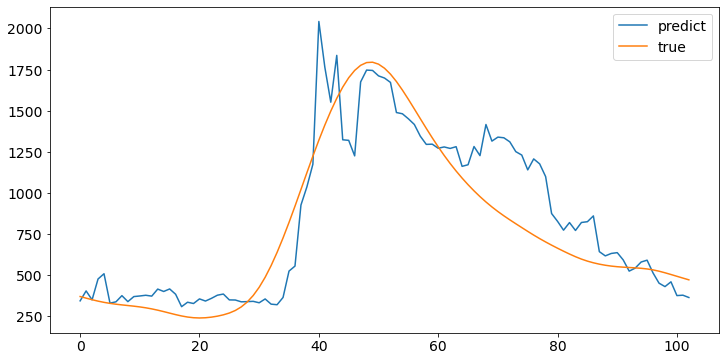

6번째 교차검증 최적화 하이퍼파라미터 : LGBMRegressor(boosting_type='goss', feature_fraction=0.28621370932722057,
              learning_rate=0.15981811624899908, max_depth=6,
              min_child_weight=2.3742257178795096, n_estimators=9341,
              num_leaves=228, random_state=42, reg_alpha=0.310665239325907,
              reg_lambda=0.7492872586961757, subsample=0.7967626781635138)
6번째 교차검증 최적화된 MAPE값 : 24.359415559759885
7번째 교차검증 7 / 23
TRAIN : (2437, 83) (2437, 1)
|   iter    |  target   | featur... | learni... | max_depth | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.4333407057741526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4333407057741526
|  1        | -26.69    |  0.4333   |  0.1906   |  5.928    |  1.796    |  5.78e+03 |  131.2    |  0.0575   |  0

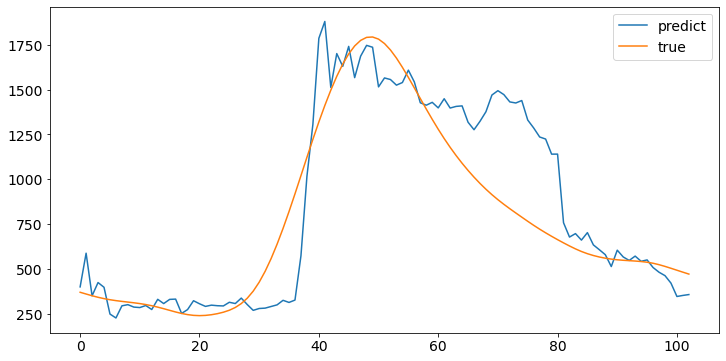

7번째 교차검증 최적화 하이퍼파라미터 : LGBMRegressor(boosting_type='goss', feature_fraction=0.7770000834225976,
              learning_rate=0.14816927376596317, max_depth=5,
              min_child_weight=0.22634193152740667, n_estimators=6413,
              num_leaves=185, random_state=42, reg_alpha=0.023192578393987293,
              reg_lambda=0.9575539951600276, subsample=0.6051769440265253)
7번째 교차검증 최적화된 MAPE값 : 23.550901858147256
8번째 교차검증 8 / 23
TRAIN : (2452, 83) (2452, 1)
|   iter    |  target   | featur... | learni... | max_depth | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.4333407057741526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4333407057741526
|  1        | -24.02    |  0.4333   |  0.1906   |  5.928    |  1.796    |  5.78e+03 |  131.2    |  0.0575   |

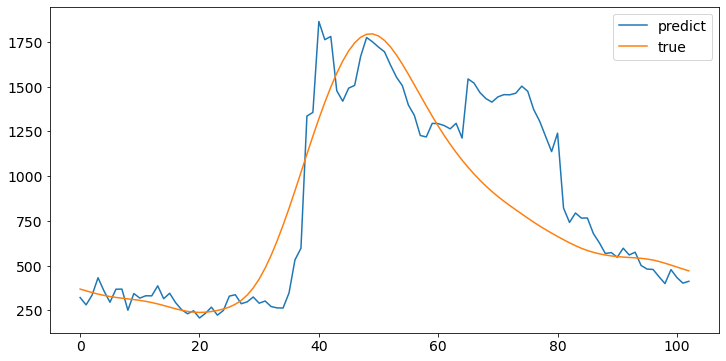

8번째 교차검증 최적화 하이퍼파라미터 : LGBMRegressor(boosting_type='goss', feature_fraction=0.4333407057741526,
              learning_rate=0.19063571821788408, max_depth=5,
              min_child_weight=1.7959754525911098, n_estimators=5780,
              num_leaves=131, random_state=42, reg_alpha=0.05750277604651747,
              reg_lambda=0.8575143843171859, subsample=0.8005575058716043)
8번째 교차검증 최적화된 MAPE값 : 24.024097745726504
9번째 교차검증 9 / 23
TRAIN : (2462, 83) (2462, 1)
|   iter    |  target   | featur... | learni... | max_depth | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.4333407057741526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4333407057741526
|  1        | -35.86    |  0.4333   |  0.1906   |  5.928    |  1.796    |  5.78e+03 |  131.2    |  0.0575   |  

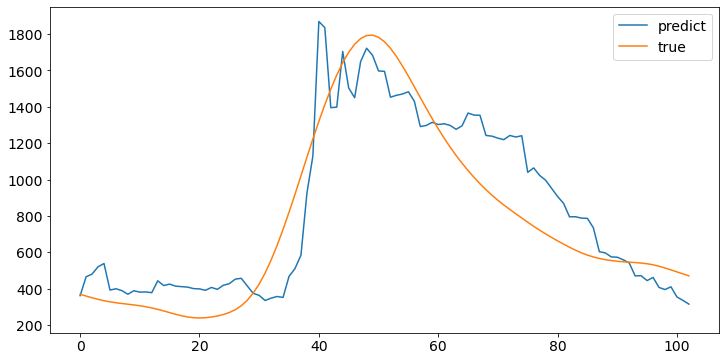

9번째 교차검증 최적화 하이퍼파라미터 : LGBMRegressor(boosting_type='goss', feature_fraction=0.7301845942384805,
              learning_rate=0.013911053916202464, max_depth=6,
              min_child_weight=2.497327922401265, n_estimators=6061,
              num_leaves=136, random_state=42, reg_alpha=0.1815704647548995,
              reg_lambda=0.3011998205299423, subsample=0.762378215816119)
9번째 교차검증 최적화된 MAPE값 : 28.963510517478337
10번째 교차검증 10 / 23
TRAIN : (2467, 83) (2467, 1)
|   iter    |  target   | featur... | learni... | max_depth | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.4333407057741526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4333407057741526
|  1        | -41.94    |  0.4333   |  0.1906   |  5.928    |  1.796    |  5.78e+03 |  131.2    |  0.0575   |  

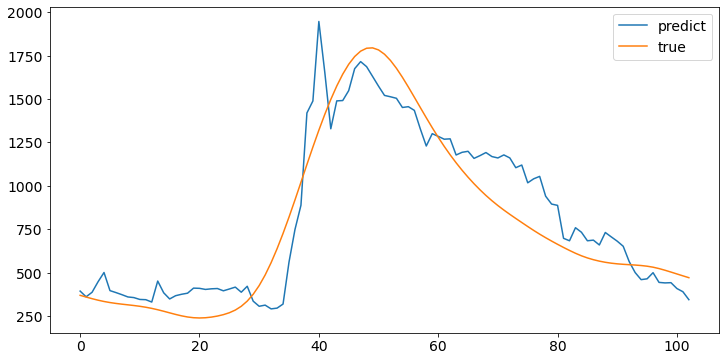

10번째 교차검증 최적화 하이퍼파라미터 : LGBMRegressor(boosting_type='goss', feature_fraction=0.5282604238131362,
              learning_rate=0.18351842034836482, max_depth=5,
              min_child_weight=0.894413489673454, n_estimators=9154,
              num_leaves=232, random_state=42, reg_alpha=0.780052231727902,
              reg_lambda=0.4753621526375081, subsample=0.7527903046211168)
10번째 교차검증 최적화된 MAPE값 : 24.277414620746665
11번째 교차검증 11 / 23
TRAIN : (2468, 83) (2468, 1)
|   iter    |  target   | featur... | learni... | max_depth | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.4333407057741526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4333407057741526
|  1        | -33.61    |  0.4333   |  0.1906   |  5.928    |  1.796    |  5.78e+03 |  131.2    |  0.0575   | 

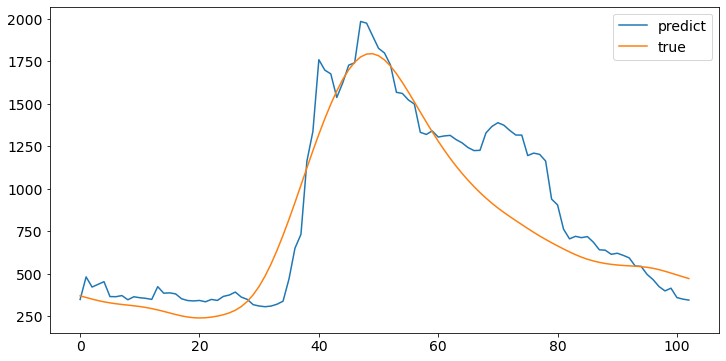

11번째 교차검증 최적화 하이퍼파라미터 : LGBMRegressor(boosting_type='goss', feature_fraction=0.7301845942384805,
              learning_rate=0.013911053916202464, max_depth=6,
              min_child_weight=2.497327922401265, n_estimators=6061,
              num_leaves=136, random_state=42, reg_alpha=0.1815704647548995,
              reg_lambda=0.3011998205299423, subsample=0.762378215816119)
11번째 교차검증 최적화된 MAPE값 : 24.24450420801308
12번째 교차검증 12 / 23
TRAIN : (2468, 83) (2468, 1)
|   iter    |  target   | featur... | learni... | max_depth | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.4333407057741526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4333407057741526
|  1        | -29.4     |  0.4333   |  0.1906   |  5.928    |  1.796    |  5.78e+03 |  131.2    |  0.0575   | 

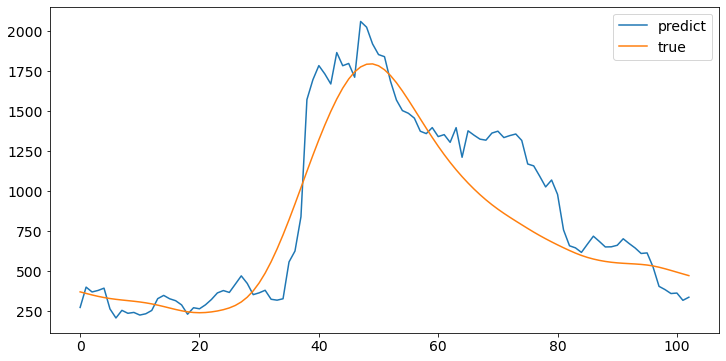

12번째 교차검증 최적화 하이퍼파라미터 : LGBMRegressor(boosting_type='goss', feature_fraction=0.28621370932722057,
              learning_rate=0.15981811624899908, max_depth=6,
              min_child_weight=2.3742257178795096, n_estimators=9341,
              num_leaves=228, random_state=42, reg_alpha=0.310665239325907,
              reg_lambda=0.7492872586961757, subsample=0.7967626781635138)
12번째 교차검증 최적화된 MAPE값 : 24.26252147899952
13번째 교차검증 13 / 23
TRAIN : (2476, 83) (2476, 1)
|   iter    |  target   | featur... | learni... | max_depth | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.4333407057741526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4333407057741526
|  1        | -40.32    |  0.4333   |  0.1906   |  5.928    |  1.796    |  5.78e+03 |  131.2    |  0.0575   |

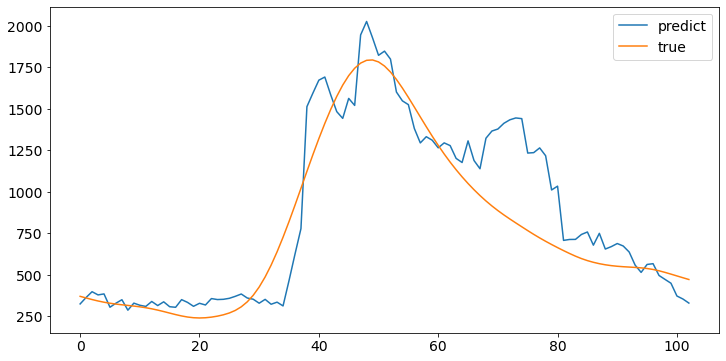

13번째 교차검증 최적화 하이퍼파라미터 : LGBMRegressor(boosting_type='goss', feature_fraction=0.2972537507933809,
              learning_rate=0.15852389700190764, max_depth=6,
              min_child_weight=0.35690792293013396, n_estimators=6465,
              num_leaves=170, random_state=42, reg_alpha=0.0773825847058851,
              reg_lambda=0.5753295985048137, subsample=0.7780827375111838)
13번째 교차검증 최적화된 MAPE값 : 23.10102097777092
14번째 교차검증 14 / 23
TRAIN : (2478, 83) (2478, 1)
|   iter    |  target   | featur... | learni... | max_depth | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.4333407057741526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4333407057741526
|  1        | -27.13    |  0.4333   |  0.1906   |  5.928    |  1.796    |  5.78e+03 |  131.2    |  0.0575   

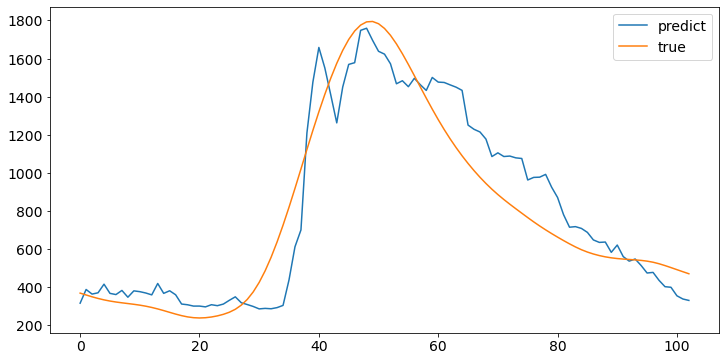

14번째 교차검증 최적화 하이퍼파라미터 : LGBMRegressor(boosting_type='goss', feature_fraction=0.7301845942384805,
              learning_rate=0.013911053916202464, max_depth=6,
              min_child_weight=2.497327922401265, n_estimators=6061,
              num_leaves=136, random_state=42, reg_alpha=0.1815704647548995,
              reg_lambda=0.3011998205299423, subsample=0.762378215816119)
14번째 교차검증 최적화된 MAPE값 : 20.257593397293373
15번째 교차검증 15 / 23
TRAIN : (2481, 83) (2481, 1)
|   iter    |  target   | featur... | learni... | max_depth | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.4333407057741526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4333407057741526
|  1        | -24.57    |  0.4333   |  0.1906   |  5.928    |  1.796    |  5.78e+03 |  131.2    |  0.0575   |

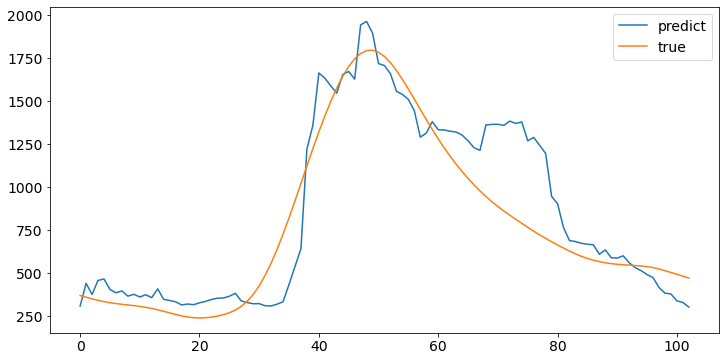

15번째 교차검증 최적화 하이퍼파라미터 : LGBMRegressor(boosting_type='goss', feature_fraction=0.41636783115709075,
              learning_rate=0.05626736916826016, max_depth=6,
              min_child_weight=0.7682166200116922, n_estimators=5272,
              num_leaves=174, random_state=42, reg_alpha=0.1566943149558707,
              reg_lambda=0.38945350395482964, subsample=0.671349411952509)
15번째 교차검증 최적화된 MAPE값 : 24.329665008645918
16번째 교차검증 16 / 23
TRAIN : (2494, 83) (2494, 1)
|   iter    |  target   | featur... | learni... | max_depth | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.4333407057741526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4333407057741526
|  1        | -34.22    |  0.4333   |  0.1906   |  5.928    |  1.796    |  5.78e+03 |  131.2    |  0.0575  

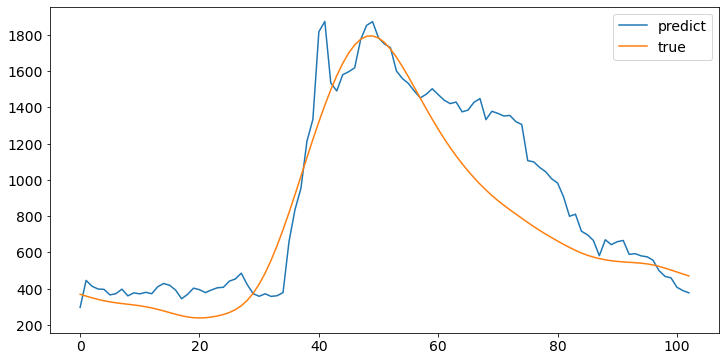

16번째 교차검증 최적화 하이퍼파라미터 : LGBMRegressor(boosting_type='goss', feature_fraction=0.16421146017771554,
              learning_rate=0.05839481118497312, max_depth=6,
              min_child_weight=2.3254520804517984, n_estimators=6060,
              num_leaves=136, random_state=42, reg_alpha=0.3634688071668558,
              reg_lambda=0.06228621143397508, subsample=0.8651803927681969)
16번째 교차검증 최적화된 MAPE값 : 26.688934740021487
17번째 교차검증 17 / 23
TRAIN : (2495, 83) (2495, 1)
|   iter    |  target   | featur... | learni... | max_depth | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.4333407057741526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4333407057741526
|  1        | -36.71    |  0.4333   |  0.1906   |  5.928    |  1.796    |  5.78e+03 |  131.2    |  0.0575 

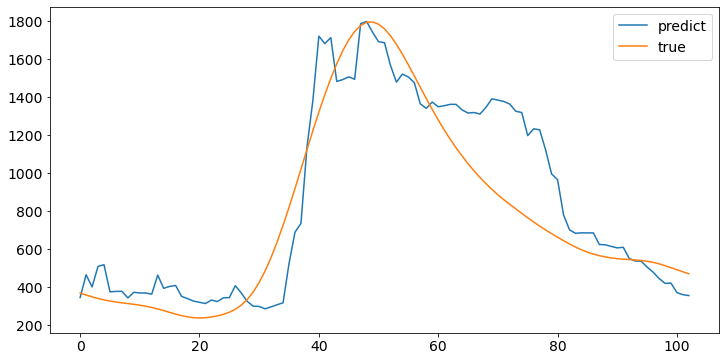

17번째 교차검증 최적화 하이퍼파라미터 : LGBMRegressor(boosting_type='goss', feature_fraction=0.7301845942384805,
              learning_rate=0.013911053916202464, max_depth=6,
              min_child_weight=2.497327922401265, n_estimators=6061,
              num_leaves=136, random_state=42, reg_alpha=0.1815704647548995,
              reg_lambda=0.3011998205299423, subsample=0.762378215816119)
17번째 교차검증 최적화된 MAPE값 : 25.368913753263367
18번째 교차검증 18 / 23
TRAIN : (2497, 83) (2497, 1)
|   iter    |  target   | featur... | learni... | max_depth | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.4333407057741526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4333407057741526
|  1        | -46.38    |  0.4333   |  0.1906   |  5.928    |  1.796    |  5.78e+03 |  131.2    |  0.0575   |

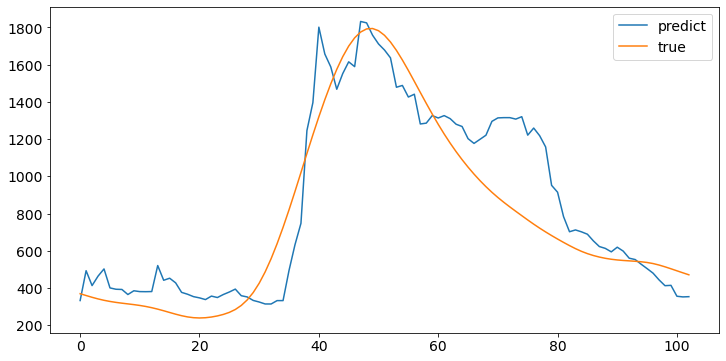

18번째 교차검증 최적화 하이퍼파라미터 : LGBMRegressor(boosting_type='goss', feature_fraction=0.7301845942384805,
              learning_rate=0.013911053916202464, max_depth=6,
              min_child_weight=2.497327922401265, n_estimators=6061,
              num_leaves=136, random_state=42, reg_alpha=0.1815704647548995,
              reg_lambda=0.3011998205299423, subsample=0.762378215816119)
18번째 교차검증 최적화된 MAPE값 : 26.040395005062926
19번째 교차검증 19 / 23
TRAIN : (2511, 83) (2511, 1)
|   iter    |  target   | featur... | learni... | max_depth | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.4333407057741526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4333407057741526
|  1        | -37.86    |  0.4333   |  0.1906   |  5.928    |  1.796    |  5.78e+03 |  131.2    |  0.0575   |

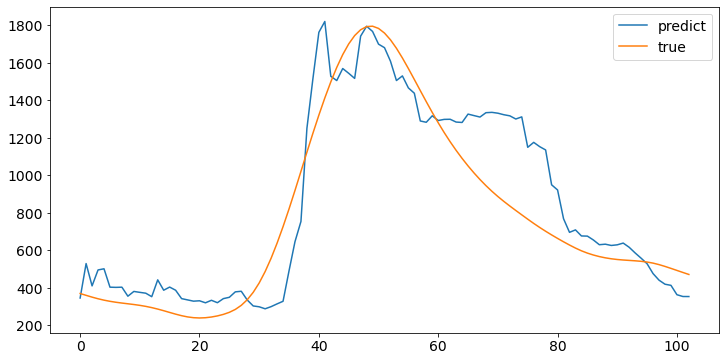

19번째 교차검증 최적화 하이퍼파라미터 : LGBMRegressor(boosting_type='goss', feature_fraction=0.7301845942384805,
              learning_rate=0.013911053916202464, max_depth=6,
              min_child_weight=2.497327922401265, n_estimators=6061,
              num_leaves=136, random_state=42, reg_alpha=0.1815704647548995,
              reg_lambda=0.3011998205299423, subsample=0.762378215816119)
19번째 교차검증 최적화된 MAPE값 : 25.078784469689946
20번째 교차검증 20 / 23
TRAIN : (2512, 83) (2512, 1)
|   iter    |  target   | featur... | learni... | max_depth | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.4333407057741526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4333407057741526
|  1        | -32.62    |  0.4333   |  0.1906   |  5.928    |  1.796    |  5.78e+03 |  131.2    |  0.0575   |

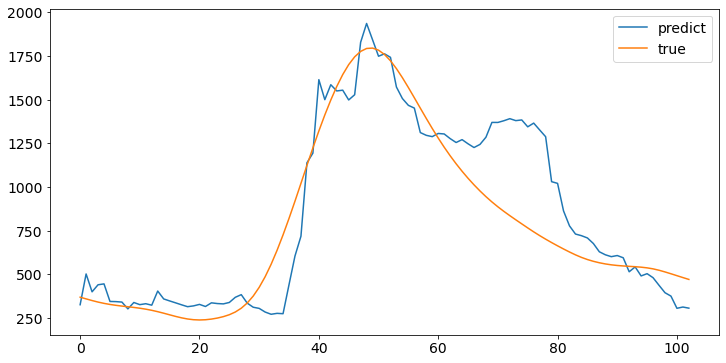

20번째 교차검증 최적화 하이퍼파라미터 : LGBMRegressor(boosting_type='goss', feature_fraction=0.41636783115709075,
              learning_rate=0.05626736916826016, max_depth=6,
              min_child_weight=0.7682166200116922, n_estimators=5272,
              num_leaves=174, random_state=42, reg_alpha=0.1566943149558707,
              reg_lambda=0.38945350395482964, subsample=0.671349411952509)
20번째 교차검증 최적화된 MAPE값 : 24.285011842516944
21번째 교차검증 21 / 23
TRAIN : (2516, 83) (2516, 1)
|   iter    |  target   | featur... | learni... | max_depth | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.4333407057741526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4333407057741526
|  1        | -32.0     |  0.4333   |  0.1906   |  5.928    |  1.796    |  5.78e+03 |  131.2    |  0.0575  

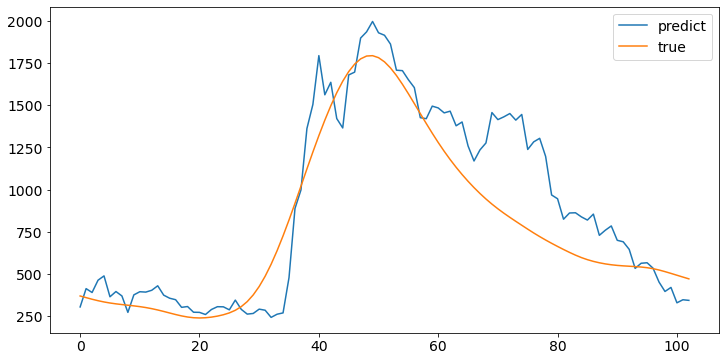

21번째 교차검증 최적화 하이퍼파라미터 : LGBMRegressor(boosting_type='goss', feature_fraction=0.5282604238131362,
              learning_rate=0.18351842034836482, max_depth=5,
              min_child_weight=0.894413489673454, n_estimators=9154,
              num_leaves=232, random_state=42, reg_alpha=0.780052231727902,
              reg_lambda=0.4753621526375081, subsample=0.7527903046211168)
21번째 교차검증 최적화된 MAPE값 : 26.806345057692717
22번째 교차검증 22 / 23
TRAIN : (2521, 83) (2521, 1)
|   iter    |  target   | featur... | learni... | max_depth | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.4333407057741526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4333407057741526
|  1        | -28.26    |  0.4333   |  0.1906   |  5.928    |  1.796    |  5.78e+03 |  131.2    |  0.0575   | 

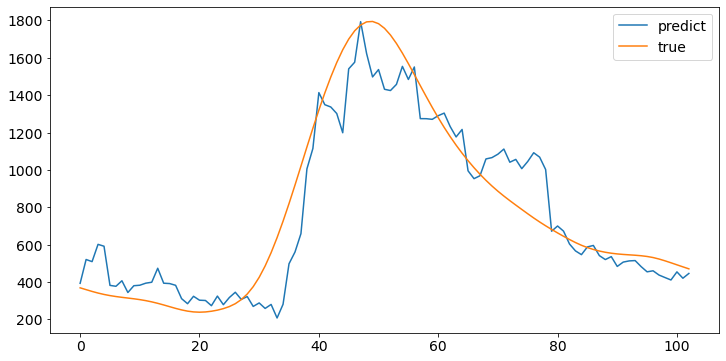

22번째 교차검증 최적화 하이퍼파라미터 : LGBMRegressor(boosting_type='goss', feature_fraction=0.821137508288374,
              learning_rate=0.1987659626415954, max_depth=6,
              min_child_weight=1.6997956567545467, n_estimators=6058,
              num_leaves=136, random_state=42, reg_alpha=0.7538020279083377,
              reg_lambda=0.969249586183674, subsample=0.6236717378931637)
22번째 교차검증 최적화된 MAPE값 : 20.064674022572817
23번째 교차검증 23 / 23
TRAIN : (2528, 83) (2528, 1)
|   iter    |  target   | featur... | learni... | max_depth | min_ch... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.4333407057741526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4333407057741526
|  1        | -29.07    |  0.4333   |  0.1906   |  5.928    |  1.796    |  5.78e+03 |  131.2    |  0.0575   |  

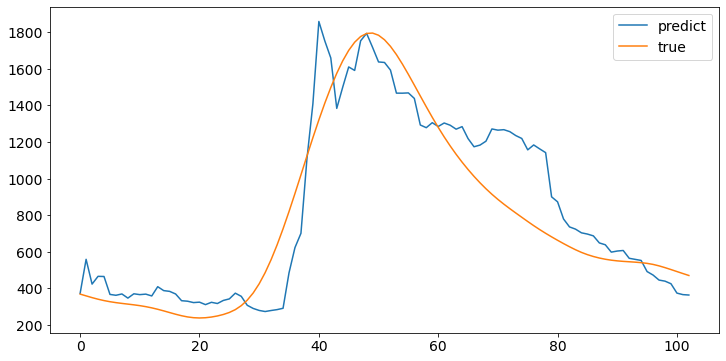

23번째 교차검증 최적화 하이퍼파라미터 : LGBMRegressor(boosting_type='goss', feature_fraction=0.7301845942384805,
              learning_rate=0.013911053916202464, max_depth=6,
              min_child_weight=2.497327922401265, n_estimators=6061,
              num_leaves=136, random_state=42, reg_alpha=0.1815704647548995,
              reg_lambda=0.3011998205299423, subsample=0.762378215816119)
23번째 교차검증 최적화된 MAPE값 : 23.362400893480473
교차검증 MAPE 평균 :  24.522938855009937


In [19]:
# 실험해보고자하는 hyperparameter 집합
pbounds = {'max_depth': (3, 7),
           'learning_rate': (0.01, 0.2),
           'n_estimators': (5000, 10000),
           'min_child_weight': (0, 3),
           'subsample': (0.5, 1),
           'num_leaves' : (100, 300),
           'feature_fraction' : (0.1, 0.99),
           'reg_alpha' : (0, 0.99),
           'reg_lambda' : (0, 0.99)
              }

result = train_val_test(scaled_train, '유입량', n = 23)

In [20]:
result

[{'target': -23.371011036006085,
  'params': {'feature_fraction': 0.7301845942384805,
   'learning_rate': 0.013911053916202464,
   'max_depth': 6.879639408647977,
   'min_child_weight': 2.497327922401265,
   'n_estimators': 6061.695553391381,
   'num_leaves': 136.36499344142013,
   'reg_alpha': 0.1815704647548995,
   'reg_lambda': 0.3011998205299423,
   'subsample': 0.762378215816119}},
 {'target': -28.81240200858227,
  'params': {'feature_fraction': 0.7770000834225976,
   'learning_rate': 0.14816927376596317,
   'max_depth': 5.513781106373205,
   'min_child_weight': 0.22634193152740667,
   'n_estimators': 6413.581412137232,
   'num_leaves': 185.57622588469587,
   'reg_alpha': 0.023192578393987293,
   'reg_lambda': 0.9575539951600276,
   'subsample': 0.6051769440265253}},
 {'target': -19.521657799315857,
  'params': {'feature_fraction': 0.7770000834225976,
   'learning_rate': 0.14816927376596317,
   'max_depth': 5.513781106373205,
   'min_child_weight': 0.22634193152740667,
   'n_estim

In [23]:
# int로 바꿔주기
for i in range(len(result)) :
    for key, value in result[i]['params'].items() :
        if key == 'num_leaves' :
            result[i]['params'][key] = int(round(value, 0))
        elif key == 'max_depth' :
            result[i]['params'][key] = int(round(value, 0))
        elif key == 'n_estimators' :
            result[i]['params'][key] = int(round(value, 0))

In [22]:
result_mape = []
for i in result :
    result_mape.append(list(i.items())[0][1] * -1)
    
print('MAPE 값을 최소화하는 하이퍼파라미터')
print(pd.DataFrame(result_mape, columns = ['유입량']).sort_values(by = '유입량').iloc[0].name, '번째 파라미터')
print(result[pd.DataFrame(result_mape, columns = ['유입량']).sort_values(by = '유입량').iloc[0].name]['params'])

MAPE 값을 최소화하는 하이퍼파라미터
2 번째 파라미터
{'feature_fraction': 0.7770000834225976, 'learning_rate': 0.14816927376596317, 'max_depth': 6, 'min_child_weight': 0.22634193152740667, 'n_estimators': 6414, 'num_leaves': 186, 'reg_alpha': 0.023192578393987293, 'reg_lambda': 0.9575539951600276, 'subsample': 0.6051769440265253}


[LightGBM] [Warning] feature_fraction is set=0.7770000834225976, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7770000834225976
LightGBM_goss's MAPE 20.290543707829883
LightGBM_goss's RMSE 181.3403118668626


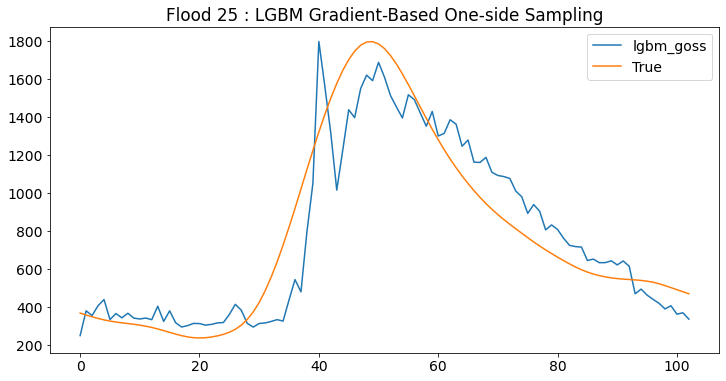

In [69]:
# scipy
from scipy.stats import boxcox, yeojohnson
from scipy.special import inv_boxcox

scaled_train_train = scaled_train[scaled_train['홍수사상번호'] != 25]
scaled_train_test = scaled_train[scaled_train['홍수사상번호'] == 25]

box_result = boxcox(scaled_train_train['유입량'])
scaled_train_train['유입량'] = boxcox(scaled_train_train['유입량'])[0]

model = lgb.LGBMRegressor(random_state = 42,
                  n_jobs = -1,
                  boosting_type = 'goss',
                  feature_fraction = 0.7770000834225976,
                  learning_rate = 0.14816927376596317,
                  max_depth = 6,
                  min_child_weight = 0.22634193152740667,
                  n_estimators = 6414,
                  num_leaves = 186,
                  reg_alpha = 0.023192578393987293,
                  reg_lambda = 0.9575539951600276,
                  subsample = 0.6051769440265253
                  )

model.fit(scaled_train_train.drop(['홍수사상번호', '유입량'], axis = 1), scaled_train_train[['유입량']])

pred = model.predict(scaled_train_test.drop(['홍수사상번호', '유입량'], axis = 1))
data_true = data_feat.copy()
data_true['True'] = data_true['유입량']
pd.concat([pd.DataFrame(inv_boxcox(pred, box_result[1]), columns = ['lgbm_goss']), data_true[data_true['홍수사상번호'] == 25][['True']].reset_index(drop = True)], axis = 1).plot()
plt.title('Flood 25 : LGBM Gradient-Based One-side Sampling')

print("LightGBM_goss's MAPE", MAPE(data_true[data_true['홍수사상번호'] == 25]['True'].reset_index(drop = True), inv_boxcox(pred, box_result[1])))
print("LightGBM_goss's RMSE", np.sqrt(mean_squared_error(pd.DataFrame(inv_boxcox(pred, box_result[1]), columns = ['lgbm_gbdt']), data_true[data_true['홍수사상번호'] == 25][['True']].reset_index(drop = True))))